<a href="https://colab.research.google.com/github/JangAY/2206096_Moch-Nazham_UTS_PengolahanCitra/blob/main/2206096_Moch_Nazham__UTS_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Histogram Citra
Program ini bertujuan untuk menghitung histogram dari citra grayscale, menormalkannya, dan menampilkan hasilnya menggunakan visualisasi

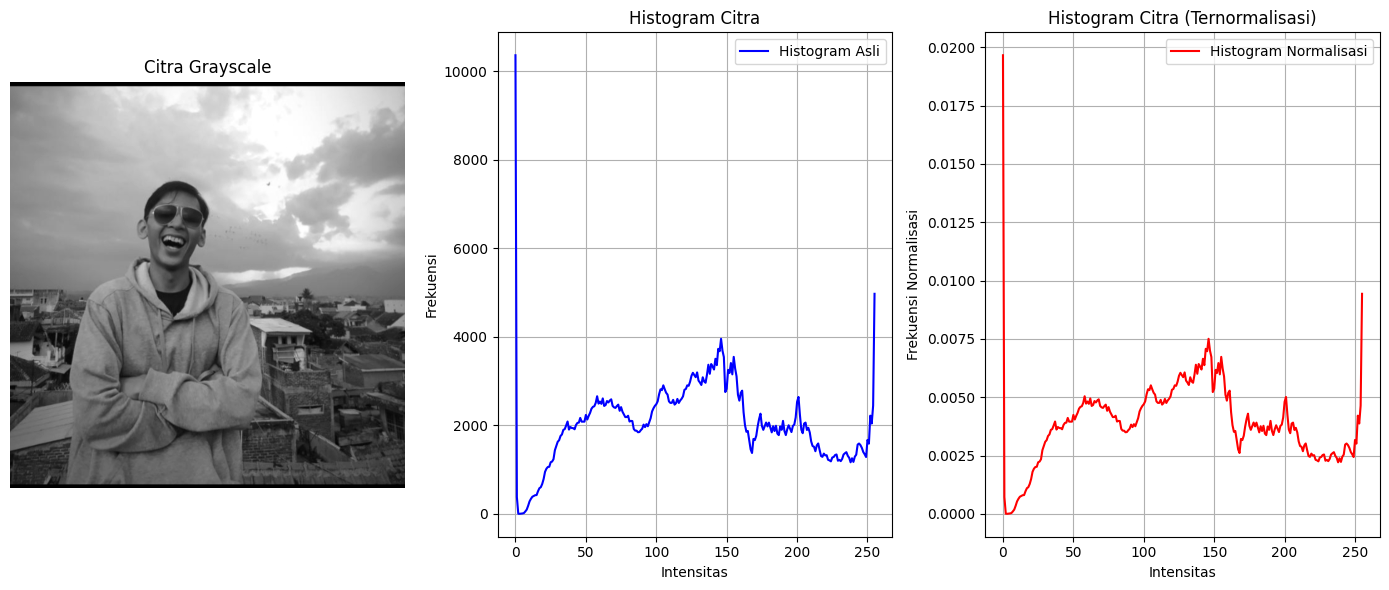

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra dalam format grayscale
image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'  # Ganti dengan path citra Anda
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dibaca
if image is None:
    print("Gagal membaca citra. Pastikan path file benar.")
    exit()

# Perhitungan histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Normalisasi histogram
hist_normalized = hist / hist.sum()

# Visualisasi citra dan histogram
plt.figure(figsize=(14, 6))

# Menampilkan citra grayscale
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Citra Grayscale")
plt.axis('off')

# Histogram asli
plt.subplot(1, 3, 2)
plt.plot(hist, color='blue', label='Histogram Asli')
plt.title("Histogram Citra")
plt.xlabel("Intensitas")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.legend()

# Histogram normalisasi
plt.subplot(1, 3, 3)
plt.plot(hist_normalized, color='red', label='Histogram Normalisasi')
plt.title("Histogram Citra (Ternormalisasi)")
plt.xlabel("Intensitas")
plt.ylabel("Frekuensi Normalisasi")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


**Penjelasan Program**

Program ini menganalisis distribusi intensitas piksel citra grayscale melalui histogram asli dan normalisasi. Histogram menunjukkan dominasi intensitas tertentu, dengan puncak di intensitas rendah mengindikasikan citra gelap, sedangkan puncak di intensitas tinggi menunjukkan citra terang. Normalisasi memungkinkan perbandingan statistik antar-citra, terlepas dari ukuran. Aplikasi praktis analisis histogram meliputi penyesuaian kontras, segmentasi, dan perbaikan kualitas citra. Jika histogram tersebar merata, citra memiliki kontras yang baik, sedangkan puncak yang terfokus pada satu sisi mencerminkan ketidakseimbangan intensitas.

# 2. Operasi Konvolusi dengan Kernel 3x3

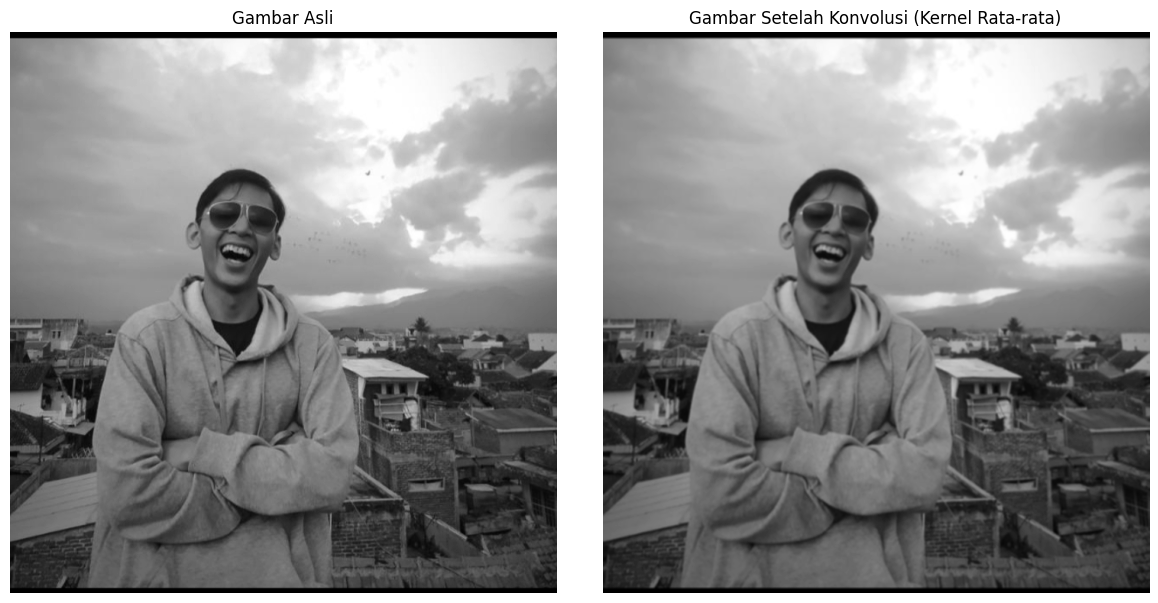

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar dalam format grayscale
image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'  # Ganti dengan path citra Anda
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validasi apakah gambar berhasil dibaca
if image is None:
    print("Gagal membaca gambar. Pastikan path file benar.")
    exit()

# Definisi kernel rata-rata 3x3
kernel = np.ones((3, 3), np.float32) / 9

# Operasi konvolusi menggunakan filter2D
image_convolved = cv2.filter2D(image, -1, kernel)

# Visualisasi gambar asli dan hasil konvolusi
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Gambar setelah konvolusi
plt.subplot(1, 2, 2)
plt.imshow(image_convolved, cmap='gray')
plt.title("Gambar Setelah Konvolusi (Kernel Rata-rata)")
plt.axis('off')

plt.tight_layout()
plt.show()


**Efek Setelah Konvolusi**

Setelah konvolusi dengan kernel rata-rata 3×3, citra menjadi lebih halus karena nilai setiap piksel diambil sebagai rata-rata piksel di sekitarnya. Ini mengurangi variasi intensitas lokal, sehingga noise kecil menjadi kurang terlihat. Namun, detail halus dan tepi tajam juga melemah, membuat citra kehilangan sebagian dari ketajamannya.

# 3. Transformasi Fourier

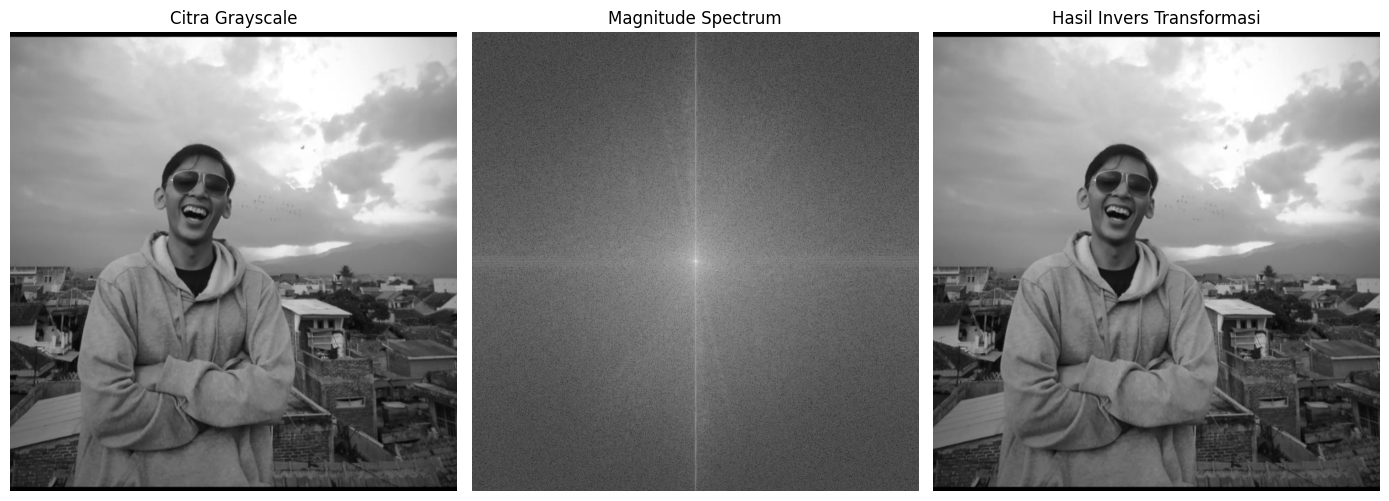

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra dalam format grayscale
image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'  # Ganti dengan path citra Anda
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dibaca
if image is None:
    print("Gagal membaca citra. Pastikan path file benar.")
    exit()

# Transformasi Fourier
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # Menggeser frekuensi nol ke tengah

# Magnitude Spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Invers Transformasi Fourier
dft_ishift = np.fft.ifftshift(dft_shift)
image_reconstructed = cv2.idft(dft_ishift)
image_reconstructed = cv2.magnitude(image_reconstructed[:, :, 0], image_reconstructed[:, :, 1])

# Visualisasi
plt.figure(figsize=(14, 6))

# Citra asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Citra Grayscale")
plt.axis('off')

# Magnitude Spectrum
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

# Citra hasil invers transformasi
plt.subplot(1, 3, 3)
plt.imshow(image_reconstructed, cmap='gray')
plt.title("Hasil Invers Transformasi")
plt.axis('off')

plt.tight_layout()
plt.show()


**Informasi dari Magnitude Spectrum**

1. Frekuensi Rendah:
Berada di pusat spektrum, mewakili informasi struktur global atau variasi intensitas piksel yang lambat. Misalnya, latar belakang yang seragam.

2. Frekuensi Tinggi:
Terletak di pinggir spektrum, mewakili detail halus atau perubahan intensitas tajam, seperti tepi objek.

3. Aplikasi:
Analisis magnitude spectrum digunakan untuk memahami pola frekuensi pada citra, seperti mendeteksi noise, memfilter frekuensi tertentu, atau menganalisis tekstur.

Magnitude spectrum memungkinkan kita memahami komponen frekuensi yang membentuk citra. Frekuensi rendah mencerminkan struktur utama, sementara frekuensi tinggi merepresentasikan detail halus. Invers transformasi Fourier menunjukkan bahwa informasi spasial dapat direkonstruksi dari domain frekuensi.

# 4. Operasi Aritmatika Citra Pencerahan

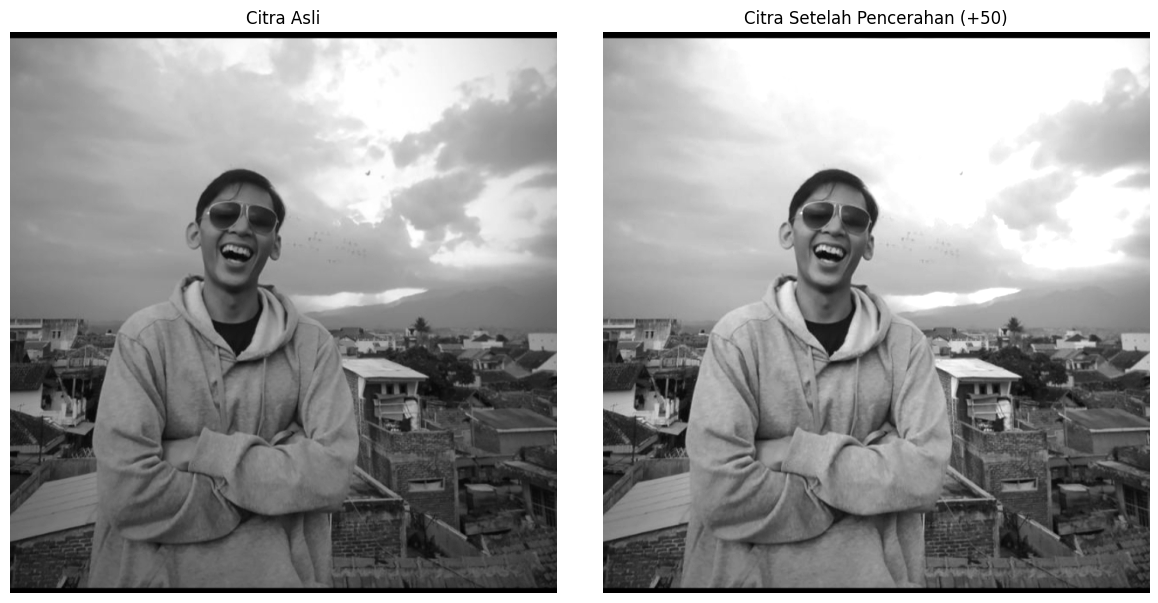

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra dalam format grayscale
image_path = '/content/drive/MyDrive/Foto/IMG_20241013_151811.jpg'  # Ganti dengan path citra Anda
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Validasi apakah citra berhasil dibaca
if image is None:
    print("Gagal membaca citra. Pastikan path file benar.")
    exit()

# Konstanta pencerahan
brightness_constant = 50

# Menambahkan konstanta dengan clipping untuk menjaga rentang piksel
brightened_image = cv2.add(image, brightness_constant)

# Visualisasi
plt.figure(figsize=(12, 6))

# Citra asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Citra Asli")
plt.axis('off')

# Citra setelah pencerahan
plt.subplot(1, 2, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title(f"Citra Setelah Pencerahan (+{brightness_constant})")
plt.axis('off')

plt.tight_layout()
plt.show()


**Penjelasan**

Setelah pencerahan, intensitas piksel pada citra meningkat, membuat citra tampak lebih terang, terutama di area gelap yang menjadi lebih jelas. Namun, piksel dengan nilai mendekati 255 pada citra asli dapat menjadi jenuh (saturasi) pada nilai maksimum, sehingga detail pada area terang mungkin hilang. Operasi ini berguna untuk memperbaiki citra yang terlalu gelap agar detailnya lebih mudah terlihat, meskipun perlu hati-hati terhadap hilangnya informasi di area terang akibat efek clipping.